In [1]:
grid_size=5
actions=["up","down","right","left"] #çapraz ilerleme ? 

In [2]:
reward_goal =1
reward_obstacle =-1 # engele takıldıgında
reward_step= -0.01 #8 adım 9 adım ve 10 adım

In [3]:
start_state= (0,0)
goal_state=(4,4)

In [4]:
import numpy as np
q_table=np.zeros((grid_size,grid_size,len(actions)))
q_table

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [5]:
learning_rate = 0.1 #q-table  güncellenirken yeni ögrendigin bilgiye ne kadar güven ? 
discount_factor = 0.95 # agent state'i ilerledikçe ödüllere uygulanacak durum
epsilon = 1.0 # başlangıç keşfi --> keşfetme oranı %100 başlangıçta tamamen random
epsilon_decay=0.995 #epsilon= epsilon *0.995 ->1.0-->0.995 --> 0.99 -->0.98
epsilon_min= 0.1 # min keşif oranı
episode_count=500

In [6]:
min(4,5),max(0,-5)

(4, 0)

In [7]:
def take_action(state, action):
    x,y =state
    if action == 'up':
       x= max(0,x-1) # max(0,-5) 0 max(0,1) 1
    elif action== 'down':
       x= min(grid_size -1,x+1)
    elif action== 'right':
        y=min(grid_size-1,y+1)
    elif action== 'left':
        y= max(0,y-1)

    return (x,y)


     

In [8]:

def render(start_state):
    for i in range(grid_size):
        row = ''
        for j in range(grid_size):
            if (i, j) == start_state:
                row += ' A '
            elif (i, j) == goal_state:
                row += ' H '
            else:
                row += ' . '
        print(row)
    print("\n")

render((0,0))  # Başlangıç durumu


 A  .  .  .  . 
 .  .  .  .  . 
 .  .  .  .  . 
 .  .  .  .  . 
 .  .  .  .  H 




In [9]:
rewards_per_episode =[]

In [10]:
import random

# 0.98
for episode in range(episode_count):
    state = start_state
    total_reward = 0
    for i in range(100):
        if random.uniform(0,1) < epsilon: # 0.80 - 1 0.91<0.90
            action_index = random.randint(0,len(actions) - 1)
        else:
            action_index = np.argmax(q_table[ state[0], state[1] ] )
    
        action = actions[action_index]
        new_state = take_action(state,action)
    
        if new_state == goal_state:
            reward = reward_goal
        elif new_state == state:
            reward = reward_obstacle
        else:
            reward = reward_step
    
        old_q_value = q_table[state[0], state[1], action_index] # ilk state (hareket ettiğim)
        next_max = np.max(q_table[new_state[0], new_state[1]]) # hareketten sonra aldığım max puan
    
        new_q_value = old_q_value + learning_rate * (reward + discount_factor * next_max - old_q_value)
        q_table[state[0],state[1], action_index] = new_q_value
    
        state = new_state
        total_reward += reward

        if state == goal_state:
            break
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    rewards_per_episode.append(total_reward)    
    # diyelim ki ajan (2,3) => Right -> 0.2
    # ilerleyen ödüller 0.7 oranında
    # 0.5 fark var Eski Q:0.2 Yeni Q: %10 0.5*0.1 => 0.05'lik bir düzeltme. 0.2 -> 0.25e çıktı Q değeri

   

In [11]:
rewards_per_episode

[-12.879999999999981,
 -8.349999999999996,
 -20.800000000000008,
 -15.849999999999982,
 -0.17000000000000015,
 -2.3699999999999948,
 -8.42999999999999,
 -5.389999999999992,
 -7.5299999999999905,
 -8.189999999999996,
 -32.68000000000005,
 -8.269999999999996,
 -1.2299999999999986,
 -16.730000000000004,
 -16.839999999999996,
 -7.489999999999991,
 -6.189999999999996,
 -8.389999999999992,
 -9.349999999999998,
 -20.80000000000003,
 -22.550000000000026,
 -5.269999999999998,
 -18.82000000000002,
 -7.169999999999996,
 -3.1099999999999977,
 -9.269999999999994,
 -7.629999999999992,
 -13.44999999999999,
 -27.73000000000004,
 -6.289999999999996,
 -2.269999999999997,
 -10.489999999999993,
 -3.3299999999999983,
 -2.169999999999999,
 -5.329999999999994,
 -16.84,
 -7.2099999999999955,
 -14.859999999999985,
 -6.529999999999989,
 -1.1499999999999995,
 -4.229999999999996,
 -6.349999999999994,
 -9.329999999999995,
 -4.2099999999999955,
 -0.07000000000000006,
 -0.15000000000000013,
 -1.1499999999999986,
 -4

In [12]:
import matplotlib.pyplot as plt

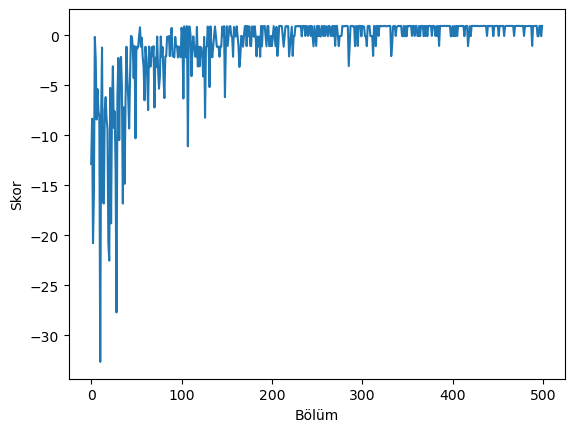

In [13]:
plt.plot(rewards_per_episode)
plt.xlabel("Bölüm")
plt.ylabel("Skor")
plt.show()


In [28]:
state = start_state
steps = 0
print("Ajan başlıyor..")

Ajan başlıyor..


In [30]:
import os
def render(start_state):
    os.system('cls' if os.name == 'nt' else 'clear')
    for i in range(grid_size):
        row = ''
        for j in range(grid_size):
            if (i,j) == start_state:
                row += ' A '
            elif (i,j) == goal_state:
                row += ' H '
            else:
                row += ' . '
            print(row)
        print("\n")

In [32]:
import time

while state != goal_state and steps < 50:
    render(state)
    action_index = np.argmax(q_table[state[0],state[1]])
    action = actions[action_index]
    state = take_action(state,action)
    steps += 1
    time.sleep(0.5)

 A 
 A  . 
 A  .  . 
 A  .  .  . 
 A  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  H 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 A 
 A  . 
 A  .  . 
 A  .  .  . 
 A  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  H 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 A 
 A  . 
 A  .  . 
 A  .  .  . 
 A  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  H 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  A 
 .  A  . 
 .  A  .  . 
 .  A  .  .  . 


 . 
 .  . 
 .  .  . 
 .  .  .  . 
 .  .  .  .  . 


 . 
 .  . 
 